# Assignment 2 - Data Science in Finance and Insurance
Submission by: Dennis Goldenberg

In [6]:
#import statements
import matplotlib.pyplot as plt;
import pandas as pd;
import numpy as np
from plotnine import *;
import patchworklib as pw;

In [7]:
#Read in Data
data = pd.read_csv("anscombe.csv")

## Part [a] - Plotting with Matplotlib

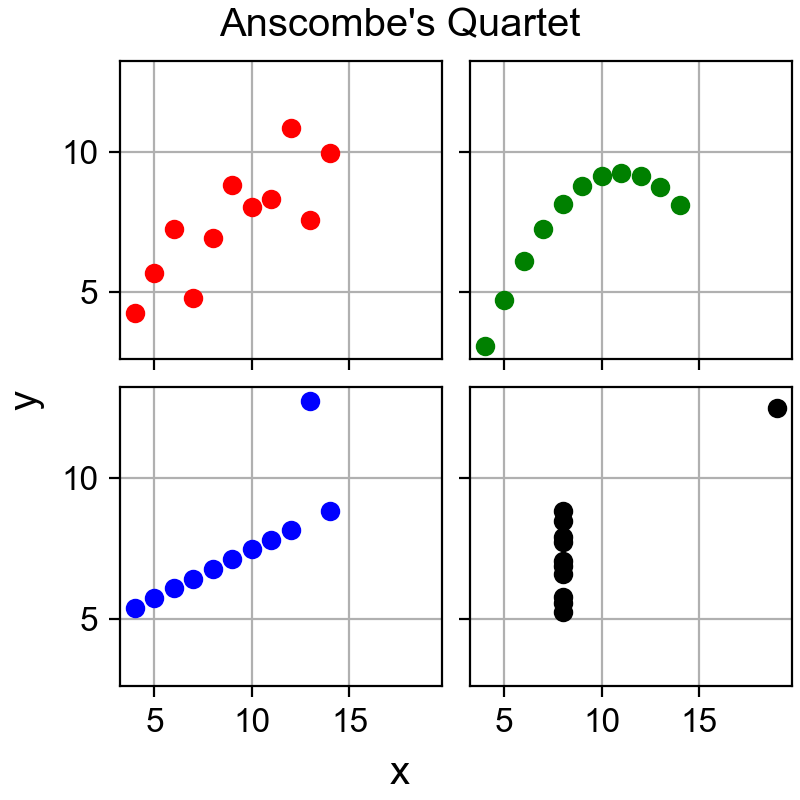

In [8]:
#Create Figure with Subplots
fig = plt.figure(figsize = (4,4), constrained_layout = True);
ax = fig.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True)


#Put Subplots 
ax[0,0].scatter(data["x1"], data["y1"], color = 'red', zorder = 2)
ax[0,0].grid(zorder = 1)


ax[0,1].scatter(data["x2"], data["y2"], color = 'green', zorder = 2)
ax[0,1].grid(zorder = 1)

ax[1,0].scatter(data["x3"], data["y3"], color = 'blue', zorder = 2)
ax[1,0].grid(zorder = 1)

ax[1,1].scatter(data["x4"], data["y4"], color = 'black', zorder = 2)
ax[1,1].grid(zorder = 1)

fig.supxlabel("x");
fig.supylabel("y");
fig.suptitle("Anscombe's Quartet")


plt.show()

## Part [b] - Plotting with plotnine, using faceting (No patchworklib)

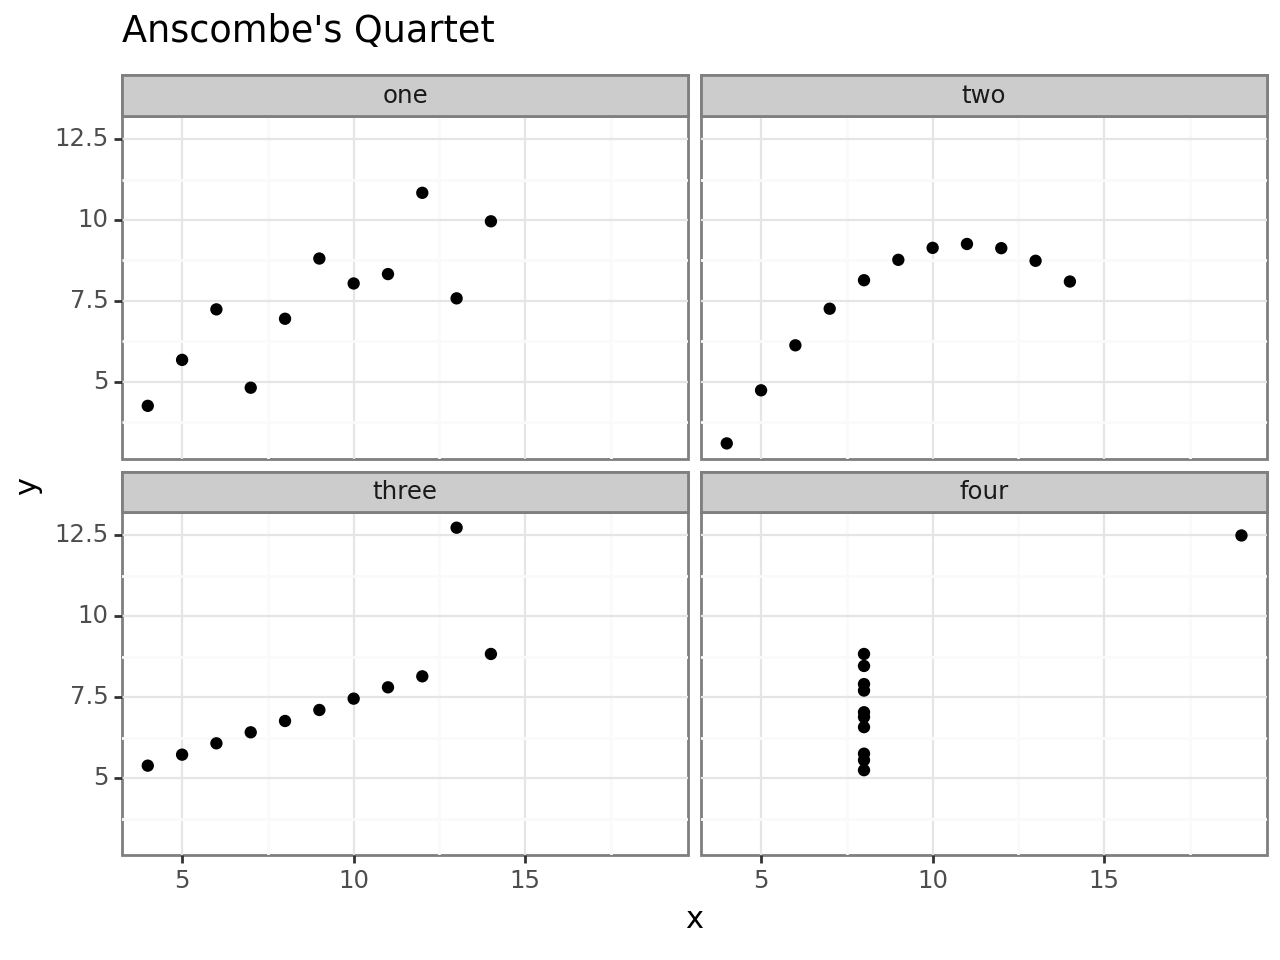

In [9]:
#Create new dataframe with classes identifying dataset

#create labels for datapoints
labels = np.hstack((np.array(['one'] * len(data["x1"].values)), np.array(['two'] * len(data["x2"].values)),\
                    np.array(['three'] * len(data["x3"].values)), np.array(['four'] * len(data["x4"].values))))
#Stack x and y values
x = np.hstack((data["x1"].values, data["x2"].values, data["x3"].values, data["x4"].values))

y = np.hstack((data["y1"].values, data["y2"].values, data["y3"].values, data["y4"].values))

#create new dataframe
labeled_data = pd.DataFrame(np.vstack((labels, x, y)).T, columns = ["Labels", "x", "y"])

#Order Category Labels and cast x,y as floats
labeled_data['Labels'] = pd.Categorical(labeled_data['Labels'], ordered = True, categories = ['one', 'two', 'three', 'four'])
labeled_data['x'] = labeled_data['x'].astype(float)
labeled_data['y'] = labeled_data['y'].astype(float)

#plot method
bplot = ggplot(labeled_data, aes('x', 'y')) + geom_point() + facet_wrap('~Labels') +\
labs(title = "Anscombe's Quartet") + theme_bw()
print(bplot)


## Part [c] - Plotting with plotnine, using patchworklib

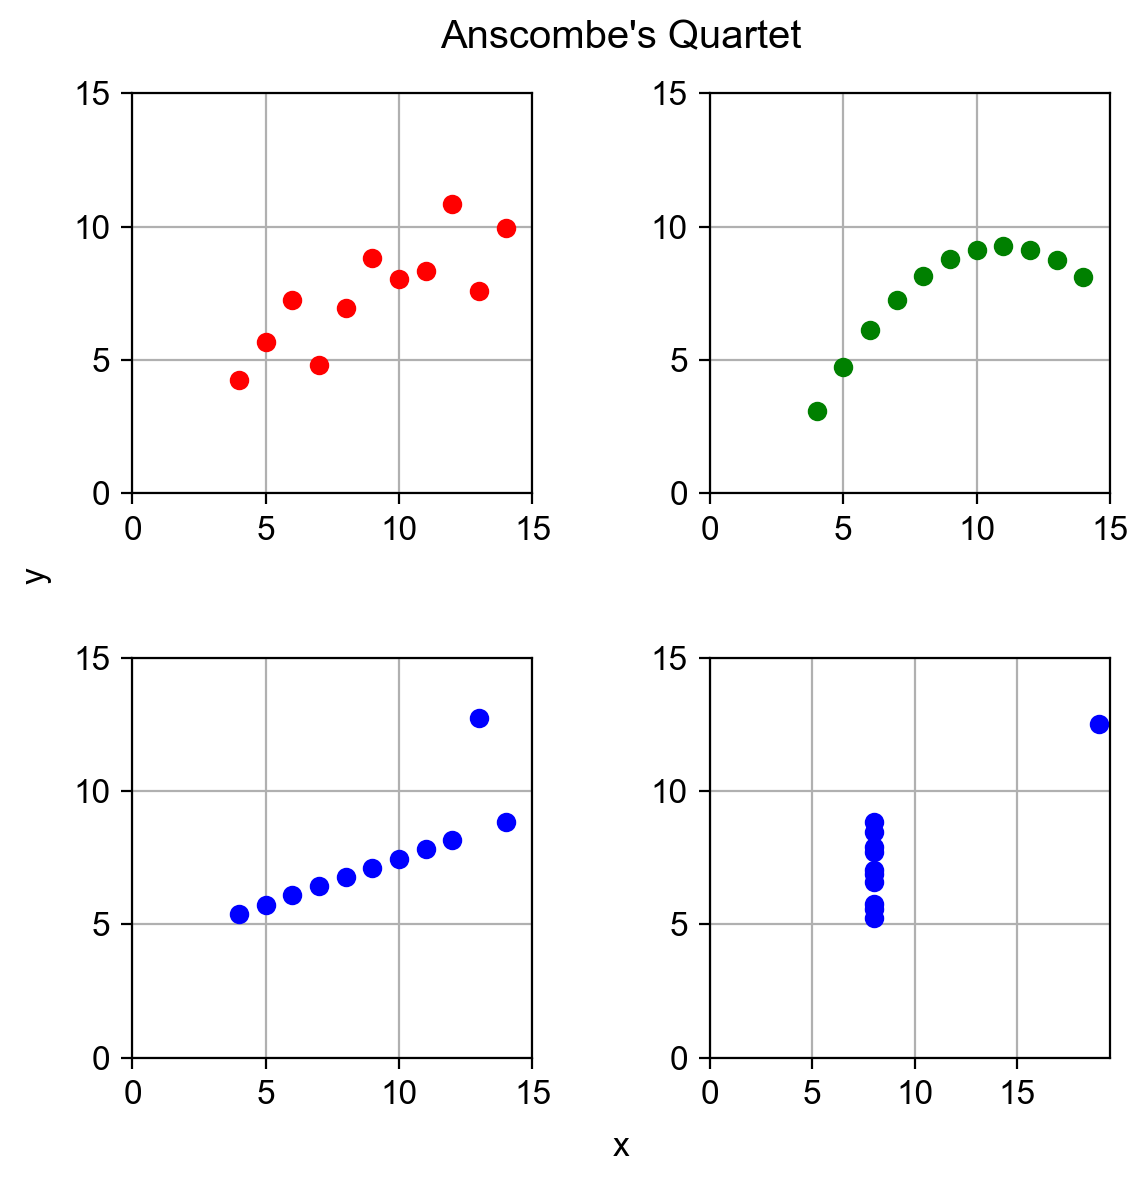

In [10]:
#Create x1, y1 plot
ax1 = pw.Brick(figsize = (2,2))
ax1.scatter(data["x1"], data["y1"], color = 'red', zorder = 2)
ax1.grid(visible = True, zorder = 1)
ax1.set_xticks([0,5,10,15])
ax1.set_yticks([0,5,10,15])

#create x2, y2 plot
ax2 = pw.Brick(figsize = (2,2))
ax2.scatter(data['x2'], data['y2'], color = 'green', zorder = 2)
ax2.grid(visible = True, zorder = 1)
ax2.set_xticks([0,5,10,15])
ax2.set_yticks([0,5,10,15])

#create x3, y3 plot
ax3 = pw.Brick(figsize = (2,2))
ax3.scatter(data['x3'], data['y3'], color = 'blue', zorder = 2)
ax3.grid(visible = True, zorder = 1)
ax3.set_xticks([0,5,10,15])
ax3.set_yticks([0,5,10,15])

#create x4, y4 plot
ax4 = pw.Brick(figsize = (2,2))
ax4.scatter(data['x4'], data['y4'], color = 'blue', zorder = 2)
ax4.grid(visible= True, zorder = 1)
ax4.set_xticks([0,5,10,15])
ax4.set_yticks([0,5,10,15])

#plot
pplot = (ax1|ax2)/(ax3|ax4)
pplot.set_suptitle("Anscombe's Quartet")
pplot.set_supxlabel("x")
pplot.set_supylabel('y')

pplot
